# 5NN CODE

#### Aim: For every galaxy in the catalog, find its 5th nearest projected neighbor within some velocity/redshift range of that galaxy.

#### Notes
--redshift slice for each galaxy can be physically motivated at the outset!

---what is biggest velocity dispersion we could expect? Coma velocity dispersion ~1100 km/s

---largest velocity dispersion we expect galaxies to physically have. Coma (MASSIVE CLUSTER) is a great reference for this. ~1100 km/s. use ~2000 km/s for 2-sigma

-----ACTUALLY. for now, +/- 500 km/s.

5NN projected distance is a biased indicator based on density. Clusters very dense, but if we reduce redshift slice too much we remove nearby galaxies with massive velocity dispersions. In less dense environments, a small redshift would be helpful - too large and we include galaxies that are not, in fact, nearby.

#### 5 Nearest Neighbor Density Equation:

$\Sigma_{5\text{NN}} = \frac{5}{\pi r_5^2}$

- units: Mpc$^{-2}$

- $r_5$ = distance to 5th nearest neighbor

#### Summarizing the order of 5NN operations:

- For some galaxy with redshift, RA, DEC, 
    - isolate_galaxy_region(cat, redshift, RA, DEC)
        - will take cat and apply the redshift and RA+DEC flags
        - galaxies within +/- 500 km/s, 3 Mpc
        - outputs sliced_cat
    - calc_projected_distance(main_RA, main_DEC, sliced_catalog)
        - central galaxy's RA, DEC == main_RA, main_DEC
        - sliced_cat is taken from isolate_galaxy_region()
        - output is a list of projected distances from central galaxy to every galaxy in sliced_catalog
    - calc_5NN(projected_distances, redshift)
        - finds 5th nearest neighbor in the projected distances list and calculates the 5NN density 
        - if len(list) < 5 after removing the central galaxy projected distance (which is 0), set 5NN density to NaN
        - uses redshift to convert r_5 from degrees back to Mpc -- assumes distance to 5NN galaxy is same as distance to central galaxy (not a problem since we are only concerned with PROJECTED distances)

In [569]:
%run 5NN_local_density.py -vr_limit 500

-vr_limit [int in km/s; default is 500] -radius_limit [int in Mpc; default is 100 (no radius bounds)]
Using vr_limit = 500 km/s
Using radius_limit = 2 Mpc
Number of Galaxies without 5NN: 5349
Execution Time: 2.1 minute(s)


In [393]:
#plot_5NN(ra,dec,all_5NN)

In [570]:
ra=cat['RA']
dec=cat['DEC']

In [573]:
good_flag = (all_5NN!=-999)

fig = figure.Figure(figsize=(14,6))
ax = fig.add_subplot()

ax.scatter(ra[all_5NN==-999], dec[all_5NN==-999], alpha=0.3, s=30, color='red', label='No 5NN')

im = ax.scatter(ra[good_flag], dec[good_flag], c=np.log10(all_5NN[good_flag]), cmap='viridis', alpha=0.5,
               s=5, vmin=-1, vmax=1.5)


ax.invert_xaxis()
ax.set_xlabel('RA (deg)',fontsize=14)
ax.set_ylabel('DEC (deg)',fontsize=14)

ax.tick_params(labelsize=14)

#ax.legend()
ax.set_title('Vcosmic +/- 500 km/s, radius +/- 2 Mpc',fontsize=15)

cb = fig.colorbar(im)
cb.ax.tick_params(labelsize=14)
cb.set_label(r'$\log$($\Sigma_5$/ Mpc$^{-2}$)',fontsize=14)

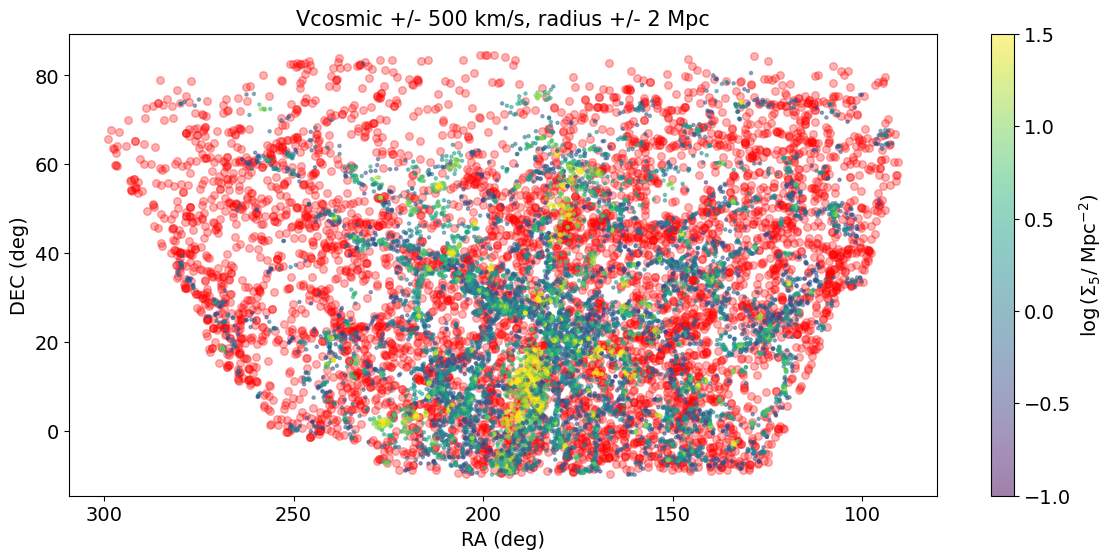

In [574]:
fig
#+/- 1500 km/s, 10 Mpc. --> 33  galaxies without 5NN
#+/- 2000 km/s, 10 Mpc. --> 24 galaxies without 5NN

In [523]:
fig.savefig(homedir+'/Desktop/fig4.png')

In [398]:
from matplotlib import pyplot as plt
%matplotlib inline

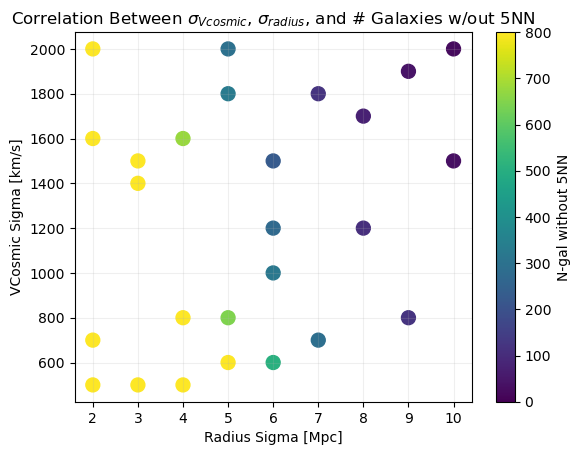

In [495]:
kms=np.array([500,2000,800,800,1000,2000,1200,1500,1500,2000,
              1600,1400,1500,1600,1800,1800,1700,800,1900,
              700,1200,500,500,600,600,700])
mpc=np.array([2,2,4,5,6,5,6,6,10,10,
              2,3,3,4,5,7,8,9,9,
              2,8,3,4,5,6,7])
ngal=np.array([5349,2919,1145,644,321,295,272,228,33,24,
               3264,1474,1398,675,331,120,73,119,43,
               4752,107,2962,1683,855,508,290])

plt.scatter(mpc,kms,c=ngal,cmap='viridis',vmin=0,vmax=800,s=100)
plt.colorbar(label='N-gal without 5NN')
plt.xlabel('Radius Sigma [Mpc]')
plt.ylabel('VCosmic Sigma [km/s]')
plt.title('Correlation Between $\sigma_{Vcosmic}$, $\sigma_{{radius}}$, and # Galaxies w/out 5NN')

plt.grid(alpha=0.2)
plt.show()

<Figure size 640x480 with 0 Axes>

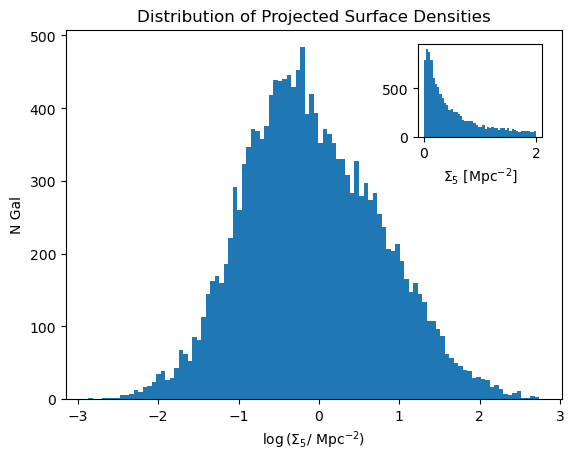

In [565]:
plt.figure()
fig,ax=plt.subplots()
im1 = ax.hist(np.log10(all_5NN[(all_5NN>0)]),bins=100)

ins = ax.inset_axes([0.71,0.71,0.25,0.25])
ins.hist(all_5NN[(all_5NN<2)&(all_5NN>0)],bins=50)
ins.set_xlabel(r'$\Sigma_5$ [Mpc$^{-2}$]')

plt.title(r'Distribution of Projected Surface Densities')
plt.xlabel(r'$\log$($\Sigma_5$/ Mpc$^{-2})$')
plt.ylabel('N Gal')
#plt.xscale('log')
#plt.xlim(-0.1,15.1)
plt.show()